In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Initial data exploration

In [2]:
file_path = "Dry_Eye_Dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [4]:
df_head = df.head()
df_head

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [5]:
df_summary = df.describe()
df_summary

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

In [ ]:
#Checking unique values
unique_values = {col: df[col].nunique() for col in df.columns}
print("\nUnique Values per Column:")
unique_values


Unique Values per Column:


{'Gender': 2,
 'Age': 28,
 'Sleep duration': 61,
 'Sleep quality': 5,
 'Stress level': 5,
 'Blood pressure': 1581,
 'Heart rate': 41,
 'Daily steps': 20,
 'Physical activity': 181,
 'Height': 51,
 'Weight': 51,
 'Sleep disorder': 2,
 'Wake up during night': 2,
 'Feel sleepy during day': 2,
 'Caffeine consumption': 2,
 'Alcohol consumption': 2,
 'Smoking': 2,
 'Medical issue': 2,
 'Ongoing medication': 2,
 'Smart device before bed': 2,
 'Average screen time': 91,
 'Blue-light filter': 2,
 'Discomfort Eye-strain': 2,
 'Redness in eye': 2,
 'Itchiness/Irritation in eye': 2,
 'Dry Eye Disease': 2}

In [9]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

In [10]:
# Display class distribution
class_distribution = df.iloc[:, -1].value_counts()
class_distribution

Dry Eye Disease
Y    13037
N     6963
Name: count, dtype: int64

Data Cleaning

Since the dataset did not have any missing values, the major cleaning steps (like imputing or dropping null values) were not needed. 

In [ ]:
# 1. Handling Outliers (for numerical columns)
# Use IQR method to detect and remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['Age', 'Sleep duration', 'Sleep quality', 'Stress level', 'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight', 'Average screen time']
for col in numerical_columns:
    df = remove_outliers(df, col)


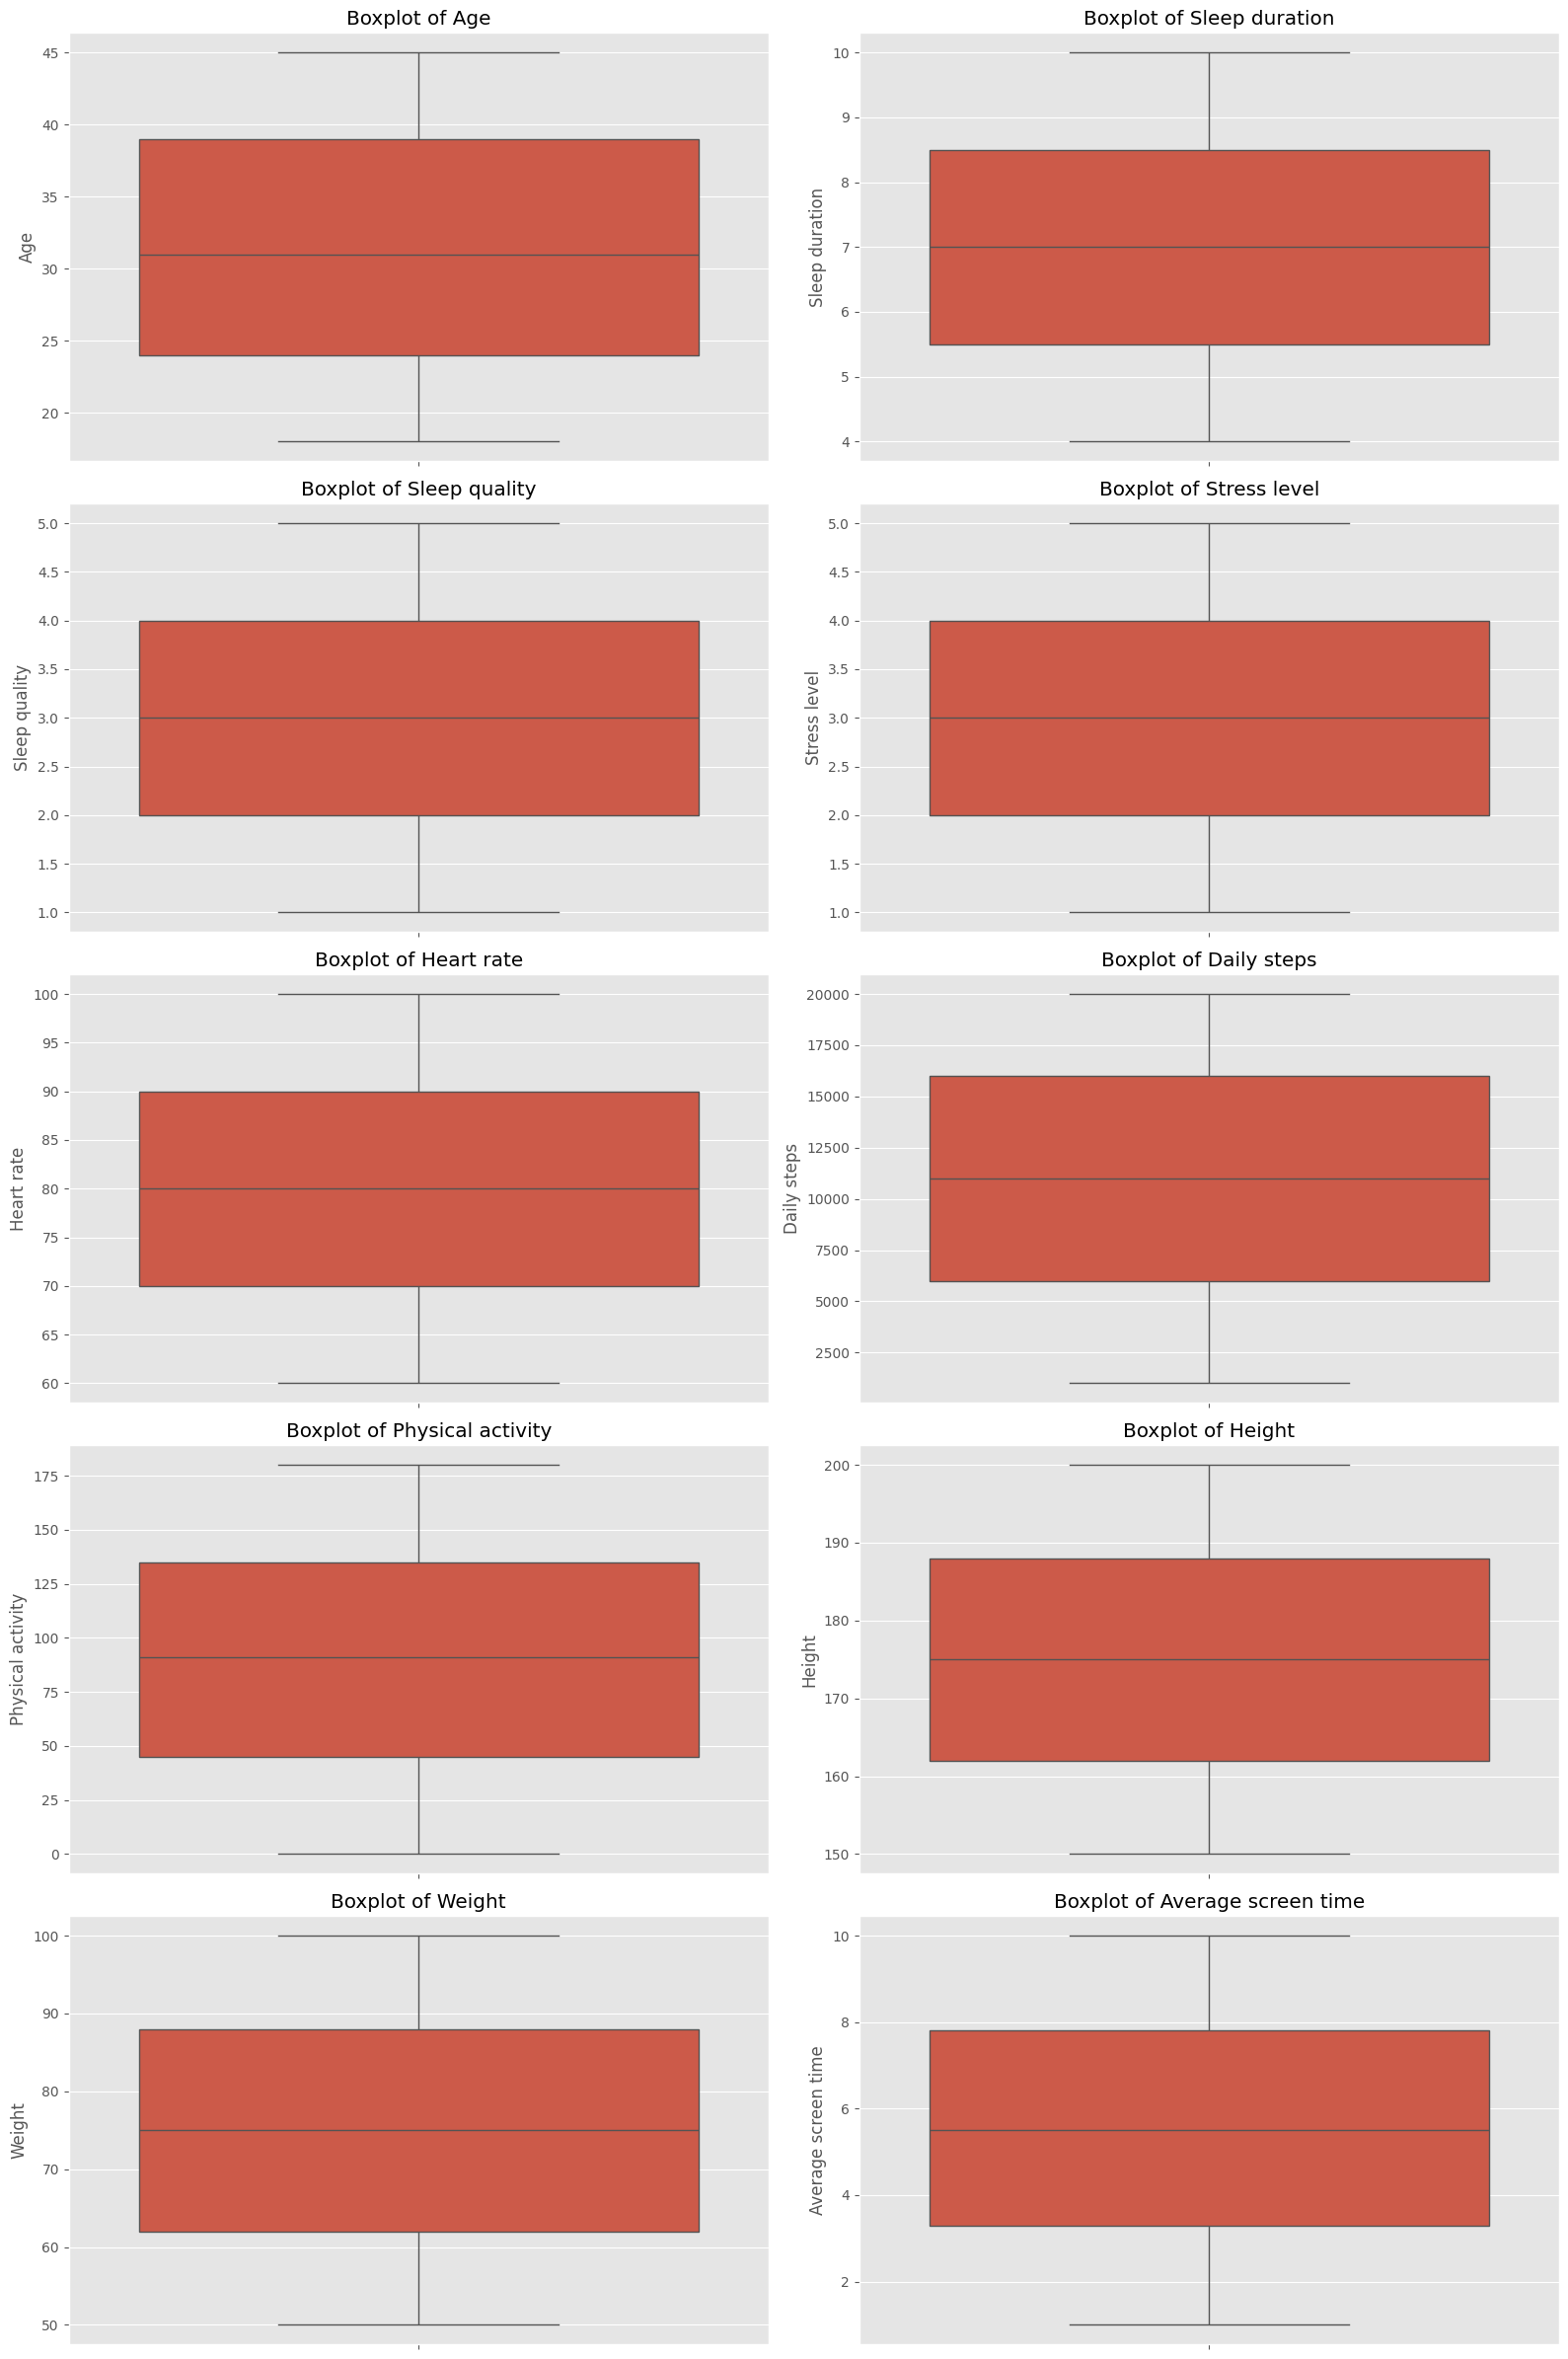

In [ ]:
#Removed outliers

plt.style.use('ggplot')

fig, axes = plt.subplots(5, 2, figsize=(16, 24))

for i, col in enumerate(numerical_columns):
    row, col_idx = divmod(i, 2)
    sns.boxplot(data=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Data Pre-processing - Encoding

# Split 'Blood pressure' into 'Systolic BP' and 'Diastolic BP'
df[['Systolic BP', 'Diastolic BP']] = df['Blood pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood pressure'], inplace=True)

# Standardize categorical binary variables (convert 'Y'/'N' to 1/0 for consistency)
binary_columns = [
    'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 
    'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 
    'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 
    'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease'
]

# Apply One-Hot Encoding to 'Gender'
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # Creates 'Gender_M' (1 for Male, 0 for Female)

for col in binary_columns:
    df[col] = df[col].map({'Y': 1, 'N': 0})

cleaned_summary = df.head()
cleaned_summary


,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,...,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Gender_M
0,24,9.5,2,1,67,3000,31,161,69,1,...,0,8.7,0,1,1,0,1,137,89,False
1,39,9.6,2,3,60,12000,74,164,87,0,...,0,9.6,1,0,0,1,1,108,64,True
2,45,5.4,1,5,95,12000,93,179,94,1,...,1,4.0,0,1,0,0,0,134,81,False
3,45,5.4,4,5,78,19000,32,160,77,0,...,0,7.6,0,1,0,1,0,110,90,False
4,42,5.7,3,2,72,4000,173,179,99,0,...,0,3.5,0,1,1,0,1,99,67,False


In [15]:
cleaned_file_path = 'Cleaned_Dry_Eye_Dataset.csv'
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path

'Cleaned_Dry_Eye_Dataset.csv'